In [7]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'
sys.path.append(modellingpath + '/lib')
#############
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
#fit 
pfitDict = {'Vc': 99.99999998437673,
 'Vd': 8.845204237579598,
 'Ve': 99.99999902098732,
 'Vf': 8.394996554940189,
 'Kvd': 0.9400832873750722,
 'Kda': 4.142114110177617,
 'Kce': 4.342277899710668,
 'Kfe': 0.4319218458202641}
pfit =np.array(list(pfitDict.values()),dtype=np.float64)

#turing dist
circuit_n=14;variant='2nd';n_species=6;nsamples=1000000
folder = 'circuit14variant2ndBalancedTuring'
with open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/turing_dataframes/turing_df_circuit%s_variant%s_%sparametersets_balanced.pkl'%(circuit_n,variant,nsamples), "rb" ) as f:
   turingDf = pkl.load(f)


circuit_n='circuit14'
variant='2nd'
n_species=6
n_param_sets = 1000000
balance = 'balanced'
generalDf= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_%s.pkl"%(circuit_n,variant,n_param_sets, balance), "rb"))
generalDf = generalDf[pfitDict.keys()].iloc[:176]
pfitDict.keys()
turingDf = turingDf[pfitDict.keys()]
concatDf = pd.concat([turingDf,generalDf])


#add fit to Turing df
concatDf.loc['fit'] = pfit


turingNp = turingDf.to_numpy(dtype=np.float64)
generalNp = generalDf.to_numpy(dtype=np.float64)
#add fit to Turing df

turingNp

concatDf

,Vc,Vd,Ve,Vf,Kvd,Kda,Kce,Kfe
3966,389.848725,281.336797,106.70254,91.260505,17.469975,1.189362,123.895925,1.720545
4085,980.317753,80.781394,148.068925,459.066671,8.75562,2.786076,627.309372,18.699044
10335,285.6555,131.493832,24.996987,16.34304,9.751127,8.568025,102.219589,2.980984
15760,975.682321,735.347987,47.357686,22.33761,39.550569,1.205247,29.281179,1.933245
20766,373.269337,33.65683,35.312855,10.68041,7.928701,1.002875,20.351175,1.80055
...,...,...,...,...,...,...,...,...
172,311.38128,67.219752,28.251391,187.528848,292.001947,54.569655,45.976562,4.239624
173,283.379394,890.860171,520.379887,34.255323,4.8127,319.845435,2.179583,3.793046
174,281.26779,691.921095,659.167503,49.302609,141.610382,4.278247,242.460399,5.726201
175,589.165465,800.568341,22.753393,270.267158,20.130422,18.923591,220.229739,4.86802


## Mahanohabis distance 

[389.84872529 281.33679725 106.70254044  91.26050492  17.46997511
   1.18936236 123.89592471   1.72054453]
(8, 8)


<AxesSubplot: ylabel='Count'>

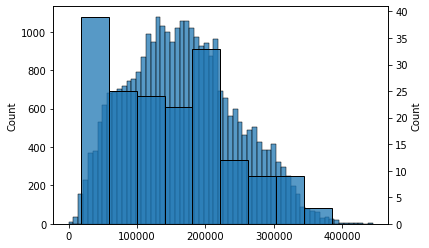

In [ ]:
#calculate mahanohabis distance for each parameter set to fit
from scipy.spatial.distance import mahalanobis
print(turingNp[0])
#calculate covariance matrix
# cov = turingDf[pfitDict.keys()].cov()
cov = np.cov(turingNp.T)
print(cov.shape)
mahalanobisTuring = []
for n1 in range(len(turingDf)):
    for n2 in range(len(turingDf)):
        if n1!=n2:
            mahalanobisTuring.append(mahalanobis(turingNp[n1], turingNp[n2], VI=cov))
mahalanobisFit = []
for n in range(len(turingDf)):
    mahalanobisFit.append(mahalanobis(turingNp[n], pfit, VI=cov))


fig, ax = plt.subplots()
sns.histplot(mahalanobisTuring, ax=ax)
ax2 = ax.twinx()
sns.histplot(mahalanobisFit, ax=ax2)
#     mahalanobisTuring.append()
# print(mahalanobis(turingNp[0], pfit, VI=cov))
# print(mahalanobis(turingNp[1], pfit, VI=cov))
# print(mahalanobis(pfit, pfit, VI=cov))
# print(mahalanobis(turingNp[1], turingNp[2], VI=cov))


## tsne 

In [ ]:
#plot tsne of turing and fit
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(concatDf)
#3d plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(tsne_results[:176,0],tsne_results[:176,1],tsne_results[:176,2], alpha=0.1, color = 'lightsteelblue')
# ax.scatter(tsne_results[176:-1,0],tsne_results[176:-1,1],tsne_results[176:-1,2], alpha=0.1, color='mediumseagreen')
# ax.scatter(tsne_results[-1,0],tsne_results[-1,1],tsne_results[-1,2],color='red')
# plt.show()
# #2d plot


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 353 samples in 0.000s...
[t-SNE] Computed neighbors for 353 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 353 / 353
[t-SNE] Mean sigma: 103.069938


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(tsne_results[:176,0],tsne_results[:176,1], alpha=0.1, color = 'lightsteelblue')
ax.scatter(tsne_results[176:-1,0],tsne_results[176:-1,1], alpha=0.1, color='mediumseagreen')
ax.scatter(tsne_results[-1,0],tsne_results[-1,1],color='red')
plt.show()